In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
training_set=os.listdir("./training_set_df_acc/")
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc/{data}"
        if df is None:
            df=pd.read_csv(file)
        else:
            d=pd.read_csv(file)
            df=pd.concat([df,d])


In [3]:
test=pd.read_csv('./test_set_df_acc/S08T1.csv')
X_test=test.drop(["label","previous_label"],axis=1)
y_test=test['label']

In [4]:
df.isna().sum()

left_elbow_shoulder_hip mean_ft    0
left_elbow_shoulder_hip std_ft     0
left_elbow_shoulder_hip max_ft     0
left_elbow_shoulder_hip min_ft     0
left_elbow_shoulder_hip var_ft     0
                                  ..
movingcenter_y quantile 75         0
movingcenter_y RMS                 0
movingcenter_y MAV                 0
previous_label                     0
label                              0
Length: 2998, dtype: int64

In [5]:
X_train=df.drop(["label","previous_label"],axis=1)
y_train=df['label']

In [6]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [7]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [8]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [9]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [10]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [11]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

              precision    recall  f1-score   support

           0       0.69      0.68      0.68        68
           1       0.50      0.25      0.33         4
           2       0.86      0.90      0.88        20
           3       0.67      0.67      0.67         6
           4       0.67      0.57      0.62        54
           5       0.50      0.60      0.55         5
           6       0.86      0.86      0.86         7
           7       0.81      0.97      0.88        30
           8       0.62      1.00      0.77         5

    accuracy                           0.72       199
   macro avg       0.69      0.72      0.69       199
weighted avg       0.71      0.72      0.71       199



<Axes: >

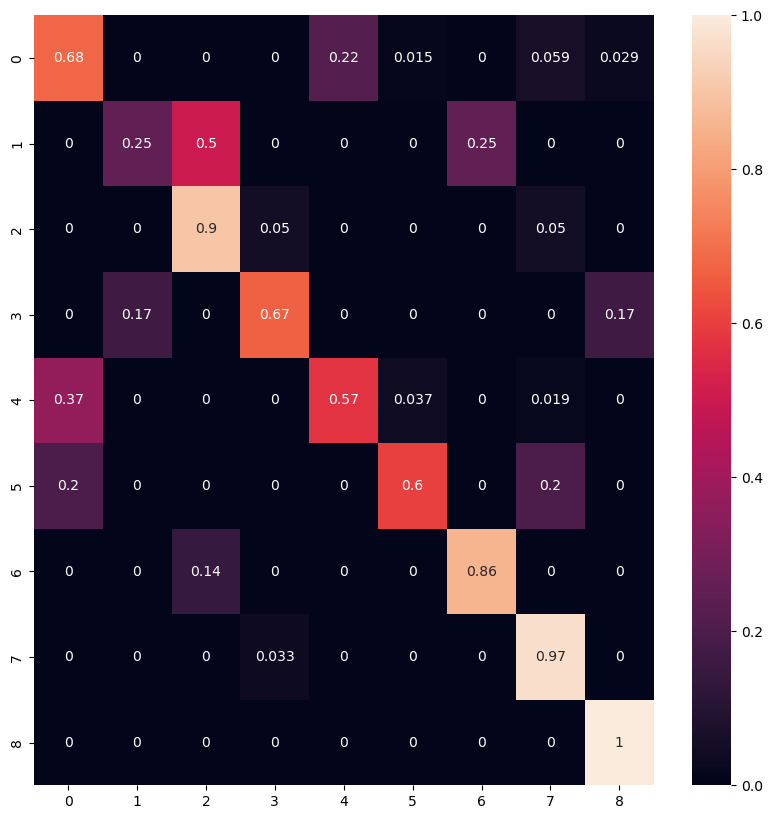

In [12]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='gini')
rf.fit(all_feature_smote, all_label_smote)
# filename = './smote_rf_model_acc.sav'
# rf=joblib.load(filename)
pred_rf=rf.predict(X_test)

print(metrics.classification_report(pred_rf,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
sns.heatmap(conf,annot=True)



In [13]:
filename = './smote_rf_model_acc.sav'
joblib.dump(rf, filename)

['./smote_rf_model_acc.sav']

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        88
           1       0.50      0.20      0.29         5
           2       0.86      0.95      0.90        19
           3       0.50      0.60      0.55         5
           4       0.43      0.56      0.49        36
           5       0.33      1.00      0.50         2
           6       0.86      0.86      0.86         7
           7       0.81      0.97      0.88        30
           8       0.88      1.00      0.93         7

    accuracy                           0.70       199
   macro avg       0.66      0.75      0.67       199
weighted avg       0.72      0.70      0.70       199



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

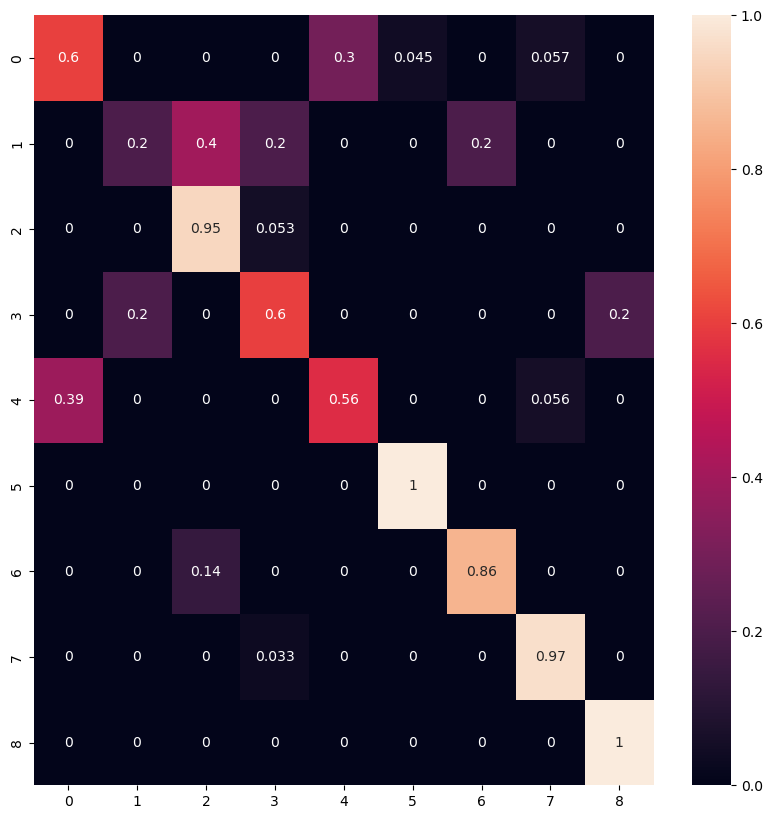

In [14]:
from xgboost import XGBClassifier#XGBcalssifier
xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
xgbcl.fit(all_feature_smote, all_label_smote)
# filename = './smote_xgb_model_acc.sav'
# xgbcl=joblib.load(filename)
pred_xgb=xgbcl.predict(X_test)
from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [15]:
# X_train_with_predictions.shape

In [16]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [17]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [18]:
filename = './smote_xgb_model_acc.sav'
joblib.dump(xgbcl, filename)

['./smote_xgb_model_acc.sav']

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        95
           1       0.50      0.33      0.40         3
           2       0.86      0.90      0.88        20
           3       0.17      0.33      0.22         3
           4       0.30      0.44      0.36        32
           5       0.50      0.75      0.60         4
           6       0.43      1.00      0.60         3
           7       0.81      0.88      0.84        33
           8       0.62      0.83      0.71         6

    accuracy                           0.64       199
   macro avg       0.55      0.67      0.59       199
weighted avg       0.70      0.64      0.66       199



<Axes: >

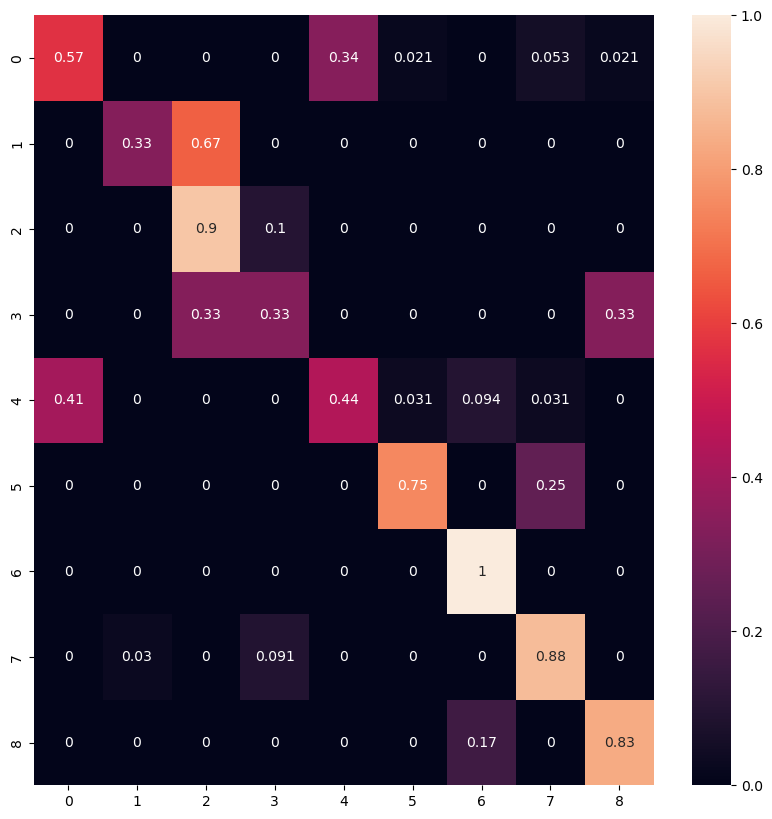

In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGBC=HistGradientBoostingClassifier(random_state=10)
HGBC.fit(X_train,y_train)
pred=HGBC.predict(X_test)

print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [20]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [21]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [22]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [23]:
# trainX=np.array(X_train)
# testX=np.array(X_test)
# trainY=np.array(y_train)
# testY=np.array(y_test)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Conv1D(128,128, activation='relu', input_shape=(len(trainX[1]), 1)))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(64, 64, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# # model.add(layers.Dense(64, activation='relu'))
# # model.add(layers.Conv1D(64, 32, activation='relu'))
# model.add(layers.MaxPooling1D(2))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='softmax'))
# # model.add(layers.Dense(32, activation='softmax'))
# model.add(layers.Dense(9,activation='softmax'))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping])

In [24]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [25]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [26]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
    y_test=test['label']
    filename = './smote_xgb_model_acc.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/xgb/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,ID,accuracy,weighted avg F1-score
0,S08T1,0.698492,0.697962
1,S08T2,0.681159,0.689132
2,N11T1,0.761905,0.774482
3,N11T2,0.733871,0.767478
4,N06T1,0.532609,0.535123
5,S02T2,0.648485,0.666775
6,N06T2,0.726316,0.742723
7,S02T1,0.696517,0.711626
8,N02T2,0.580247,0.583066
9,N02T1,0.637931,0.639820


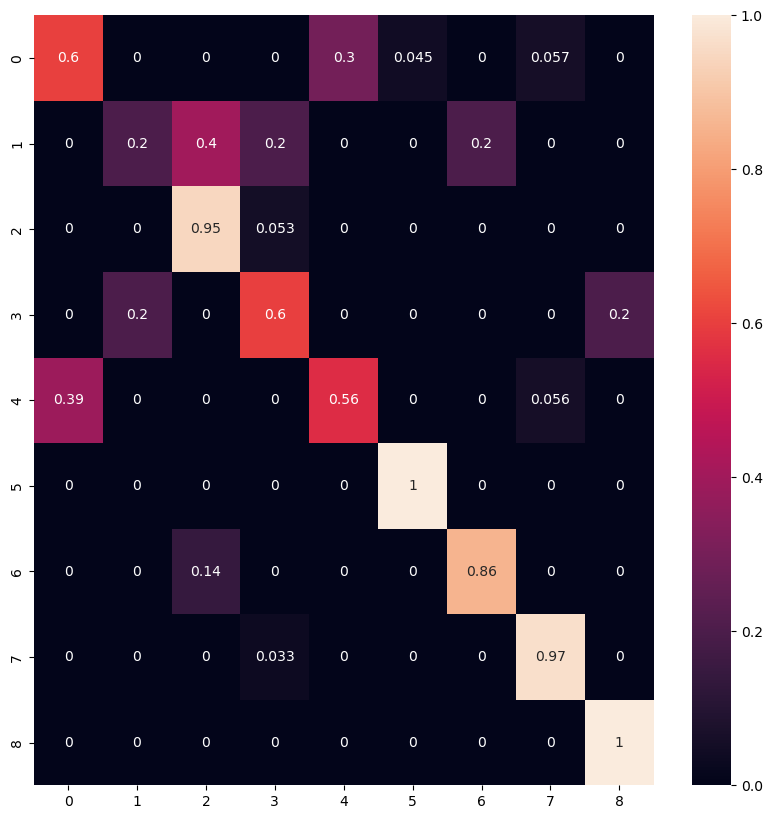

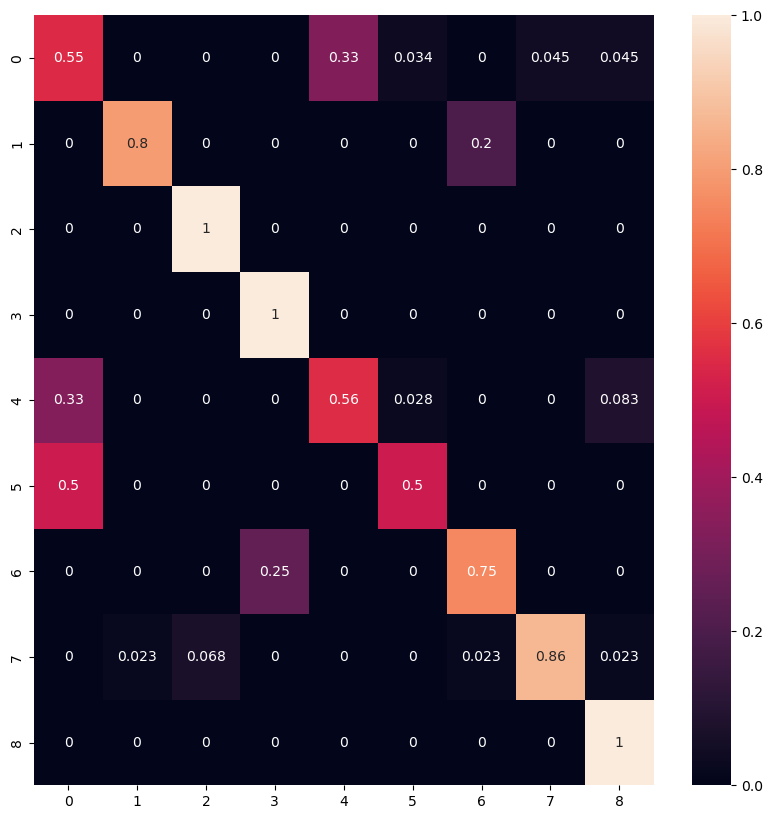

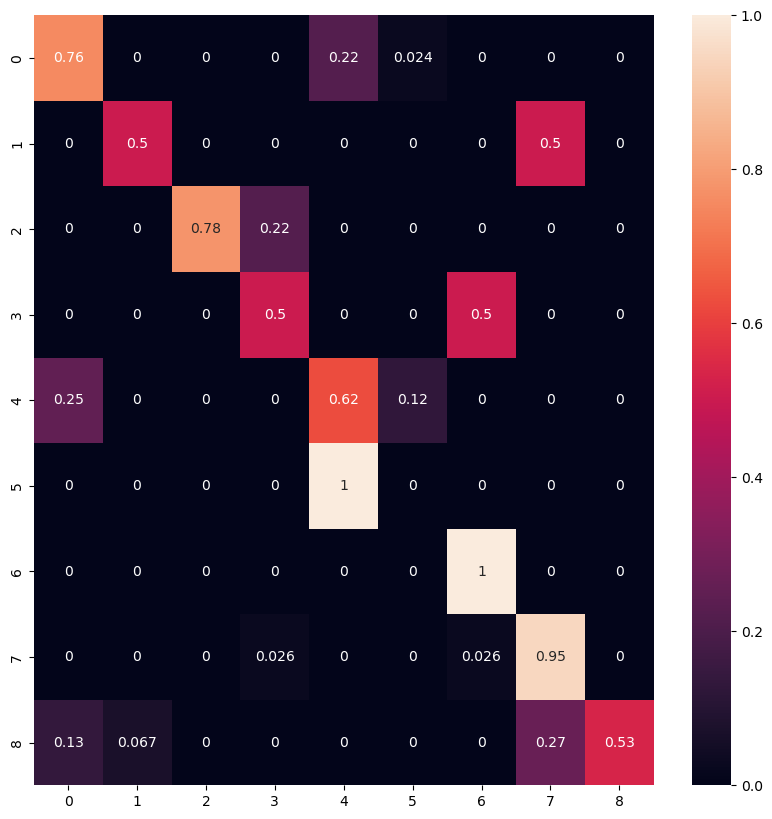

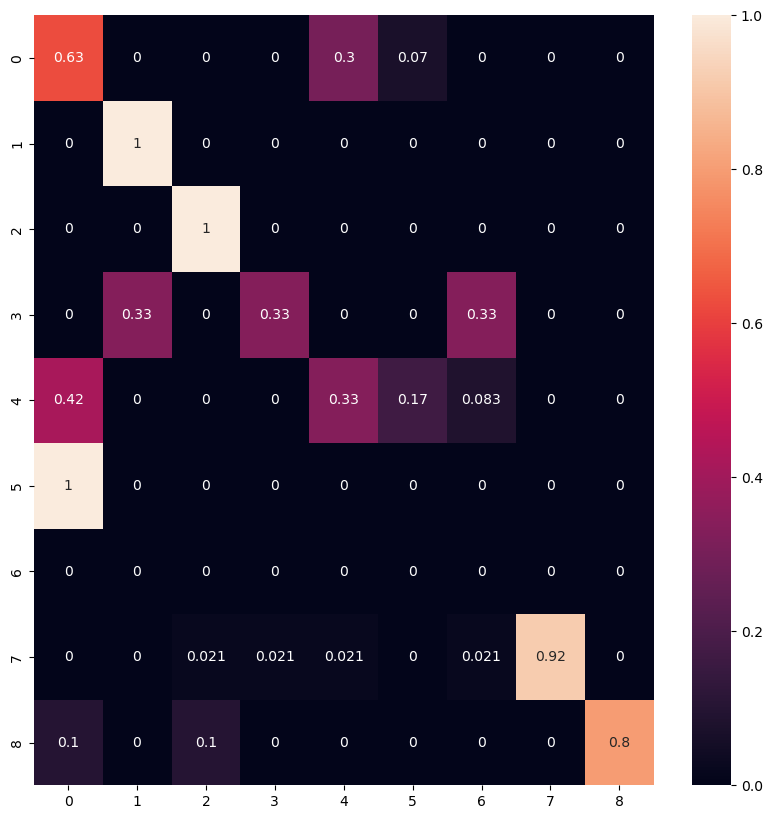

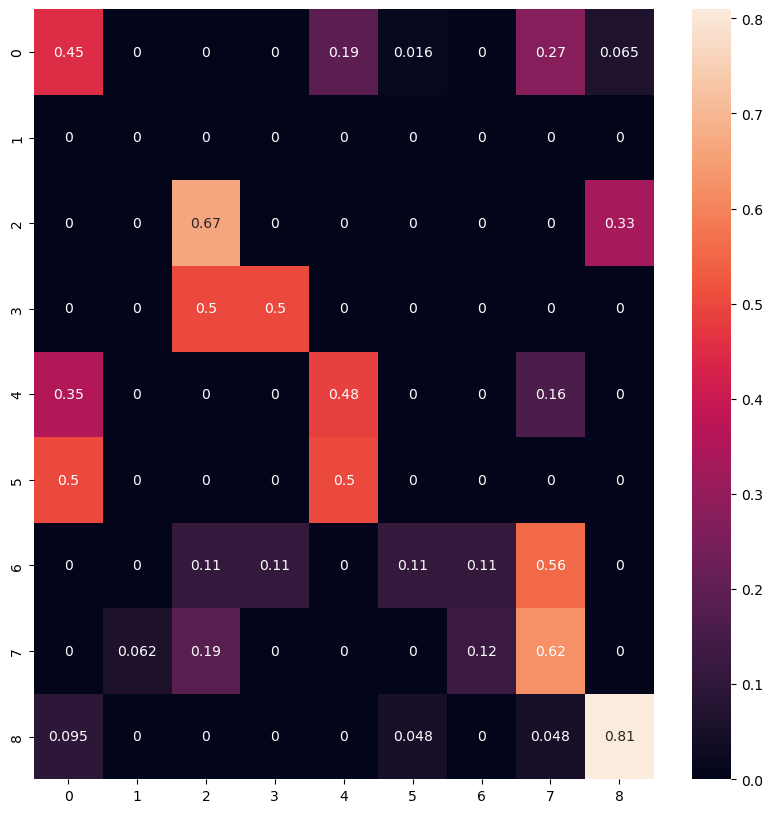

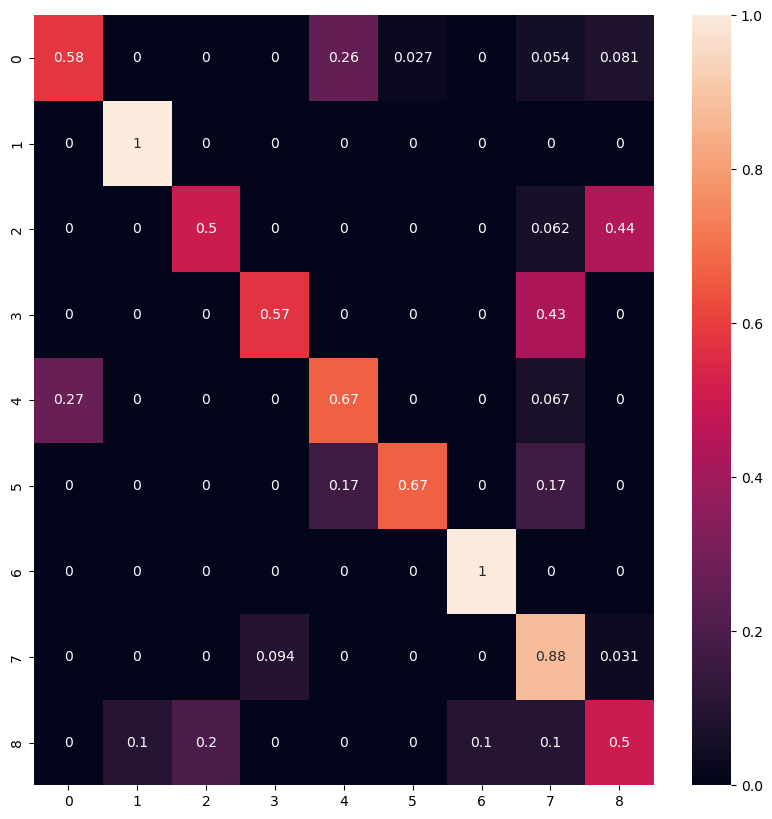

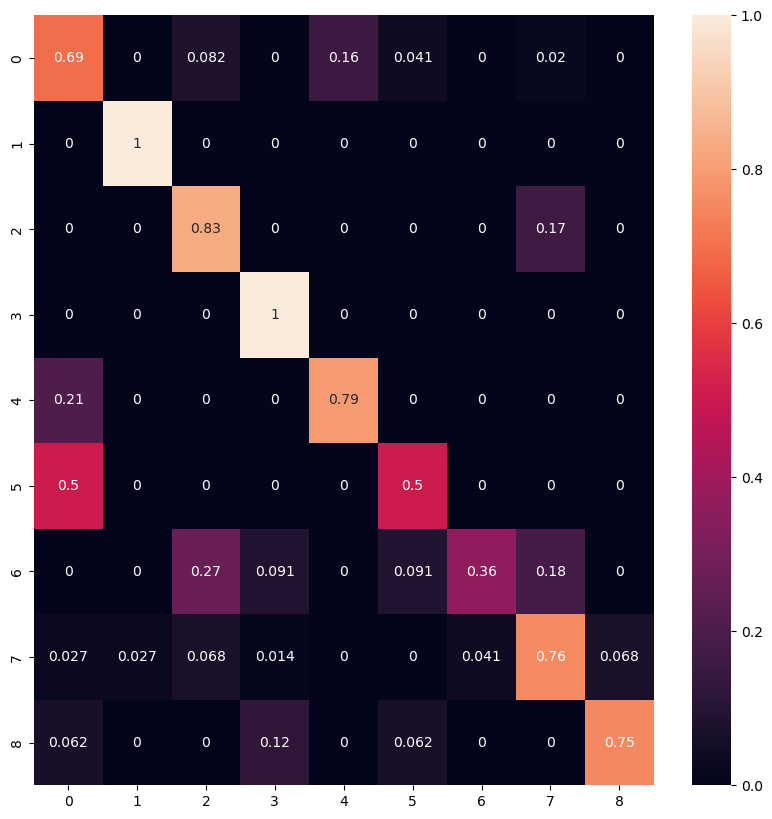

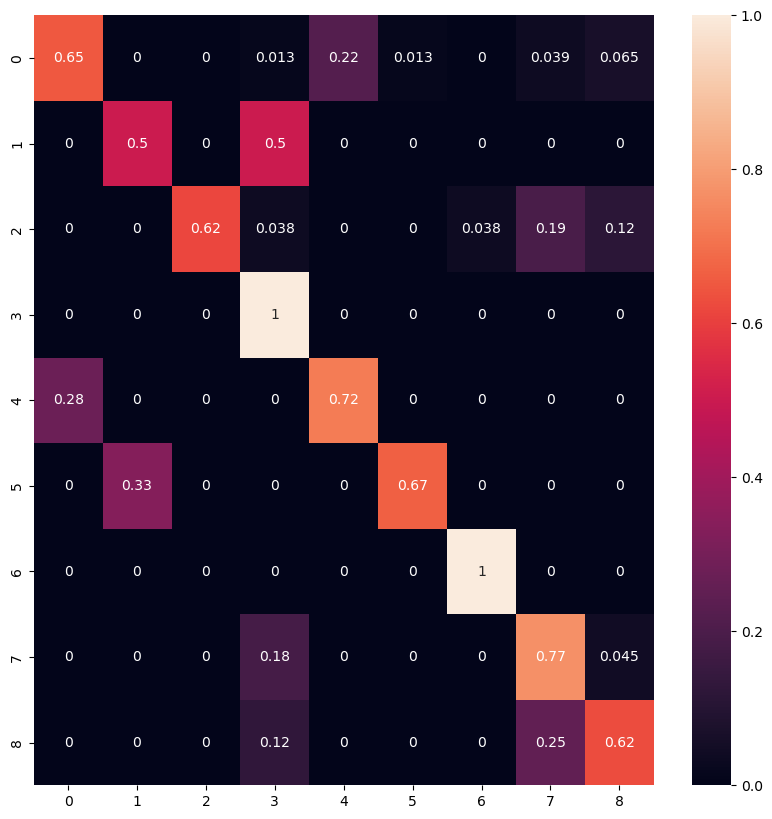

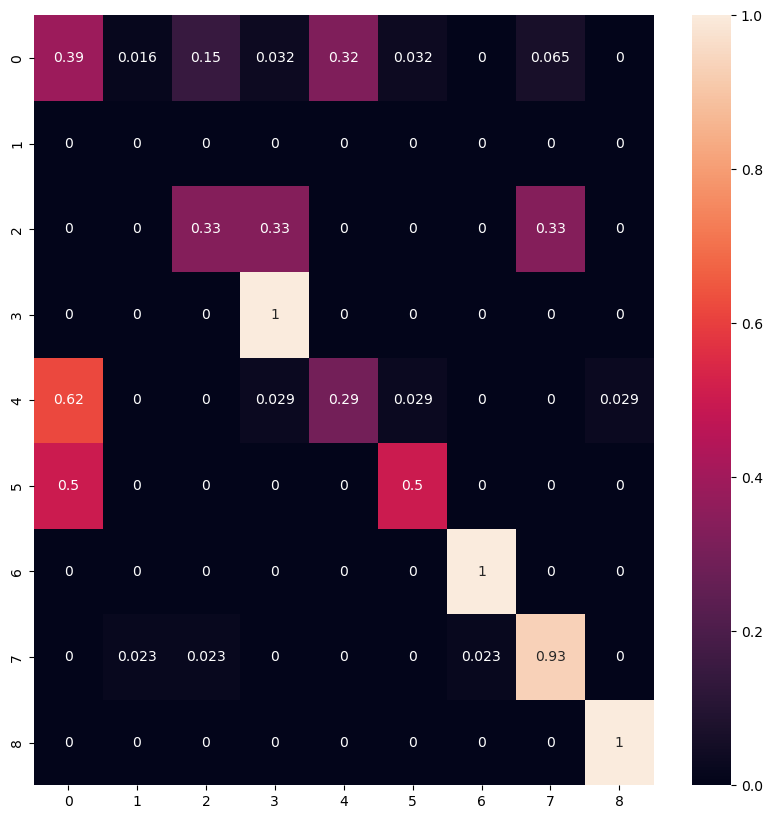

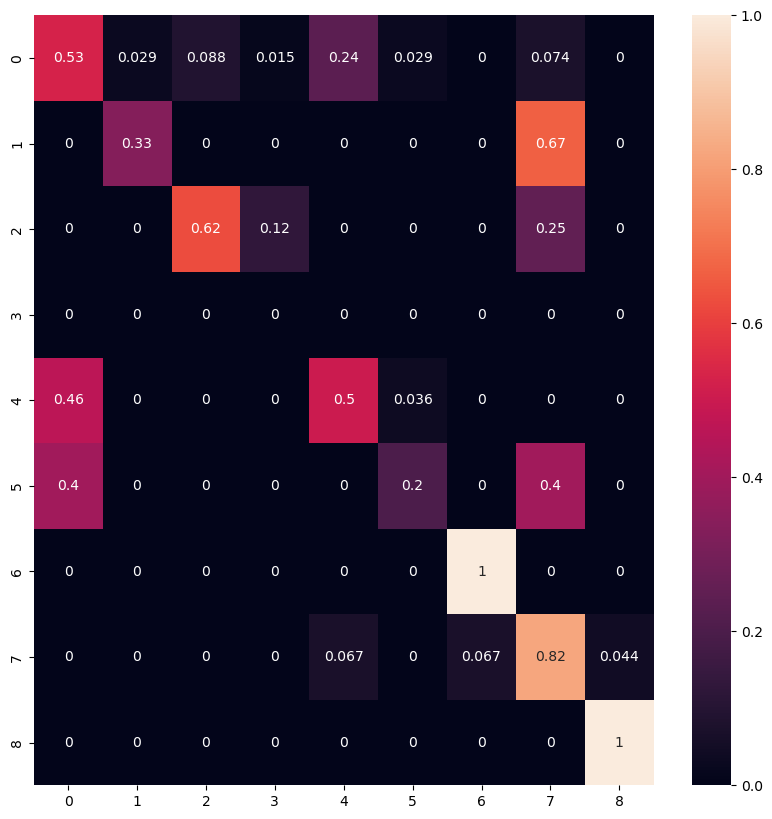

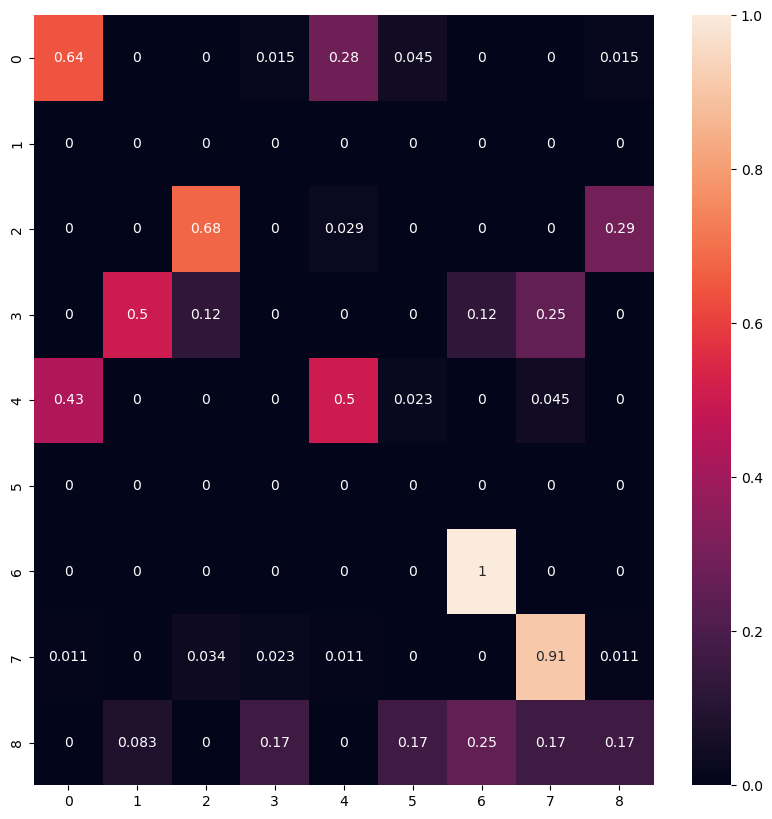

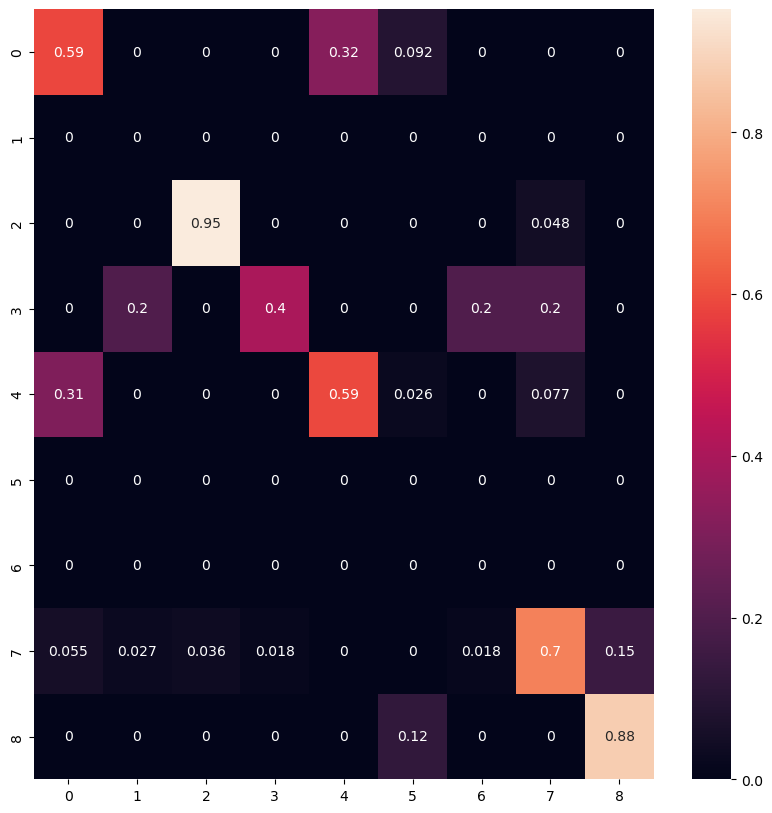

In [27]:
test_set=os.listdir('./test_set_df_acc')
out_xgb=[]
for ID in test_set:
    output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score'])
out_df_xgb

In [28]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df_acc/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
    y_test=test['label']
    filename = './smote_rf_model_acc.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/rf/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.641217,0.662442
std,0.085179,0.085209
min,0.487654,0.497483
25%,0.606024,0.648715
50%,0.666667,0.695560
75%,0.696749,0.703162
max,0.757576,0.771416


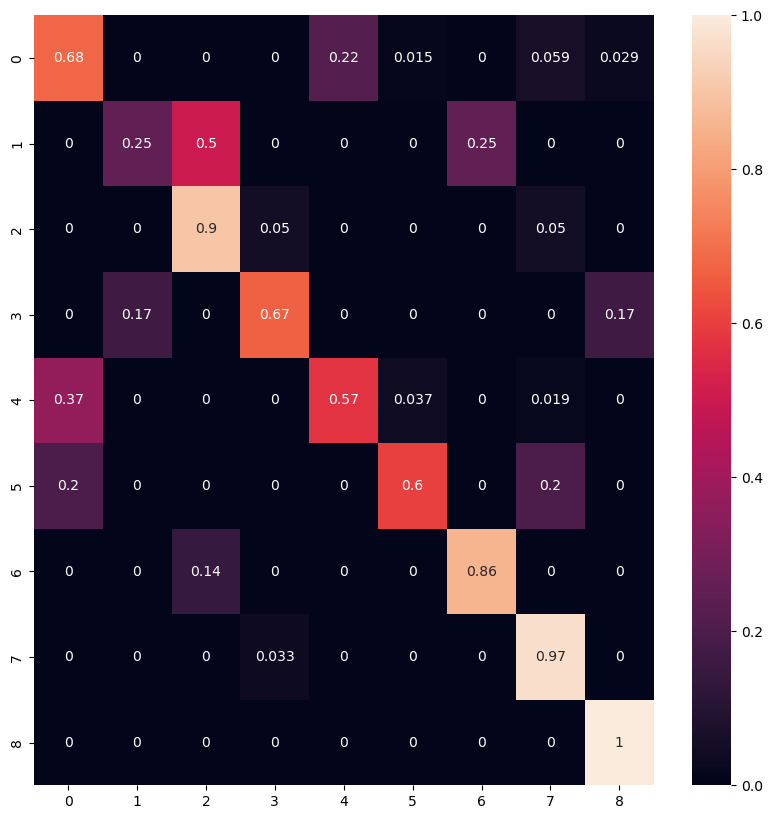

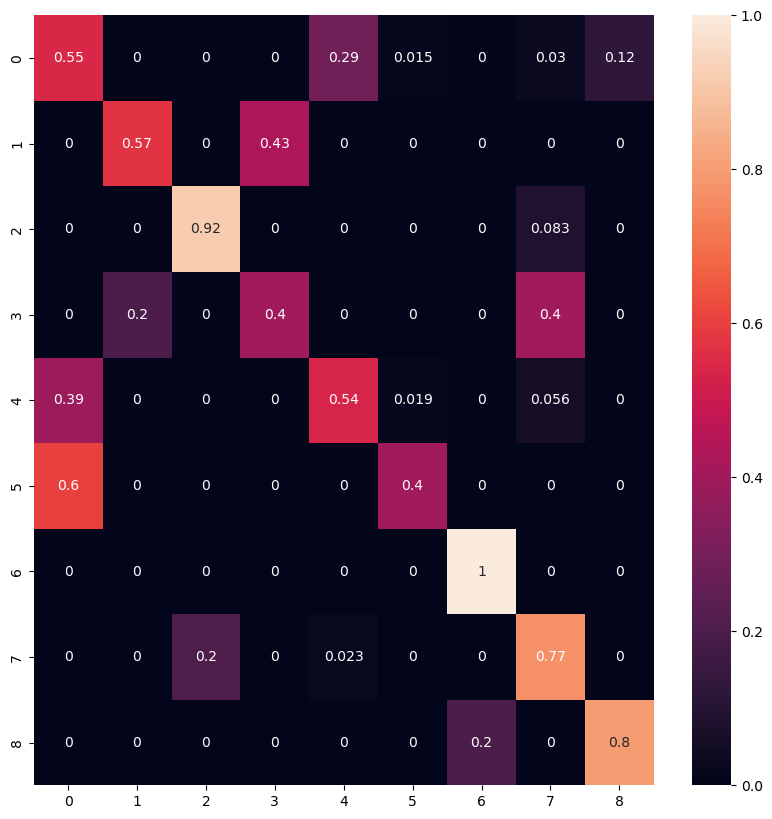

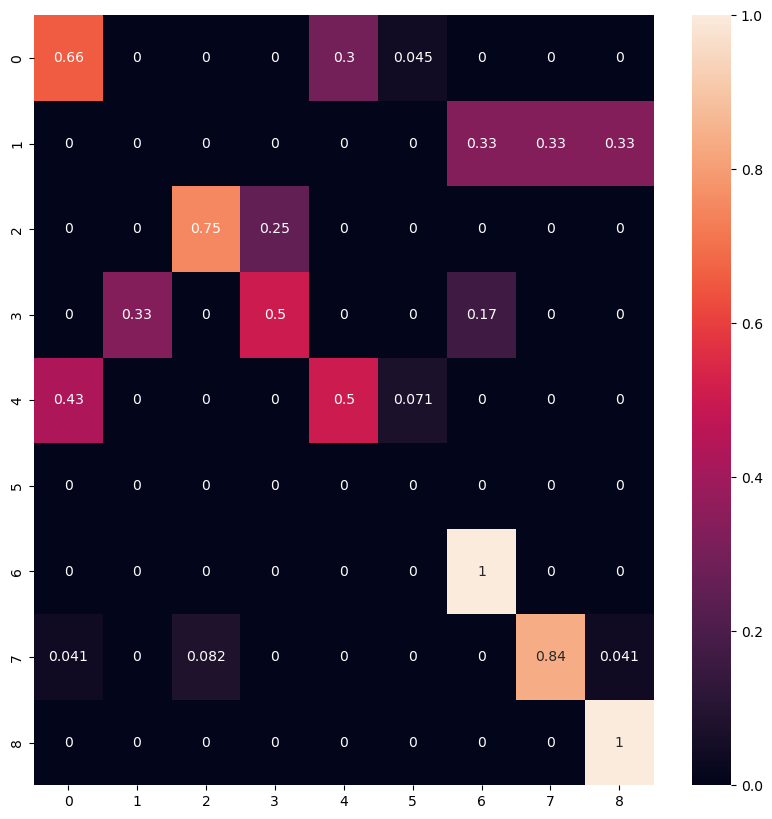

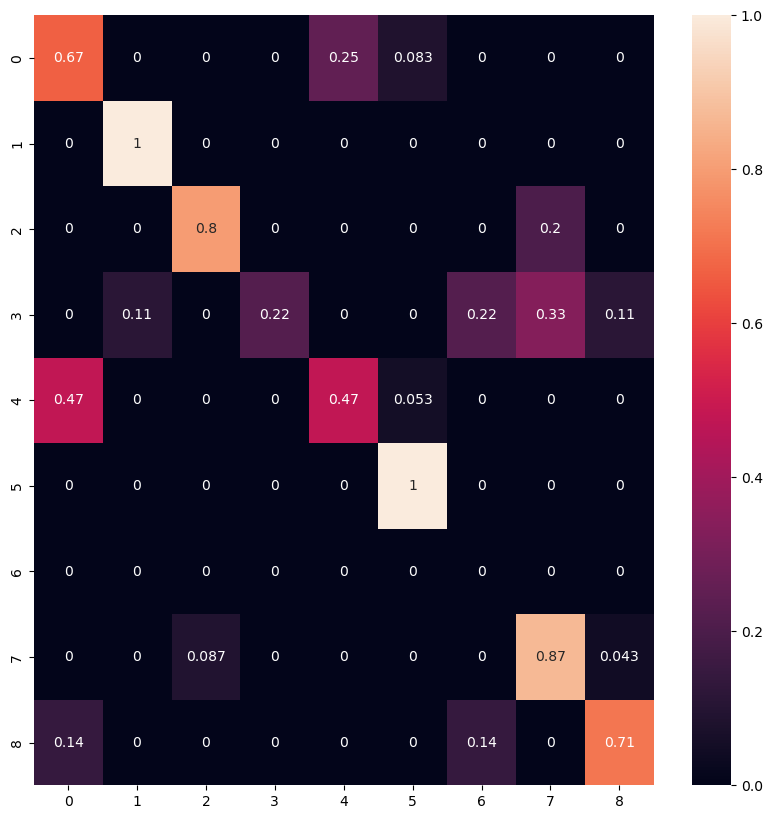

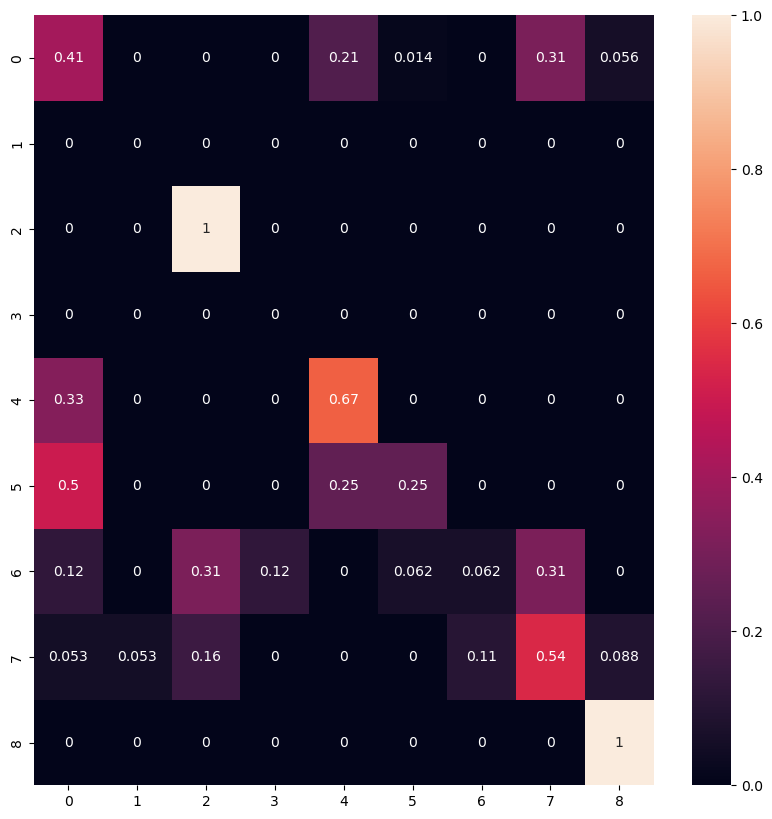

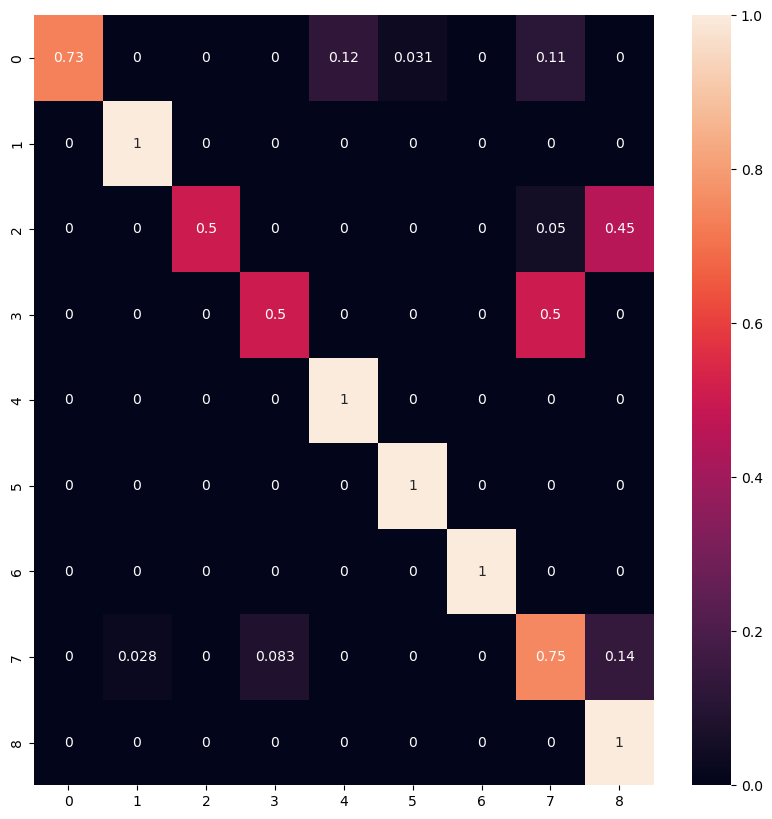

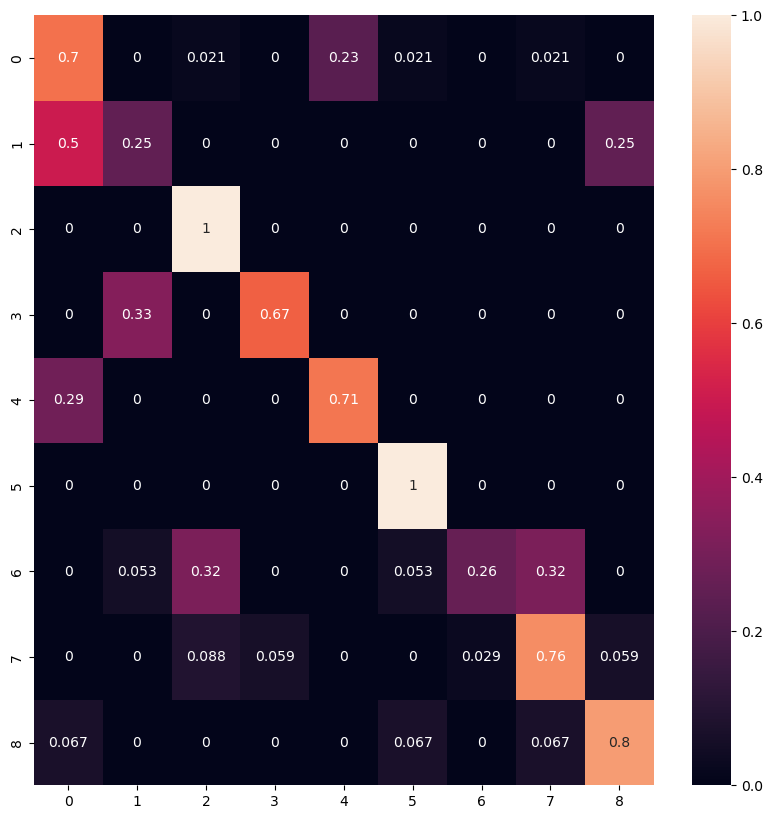

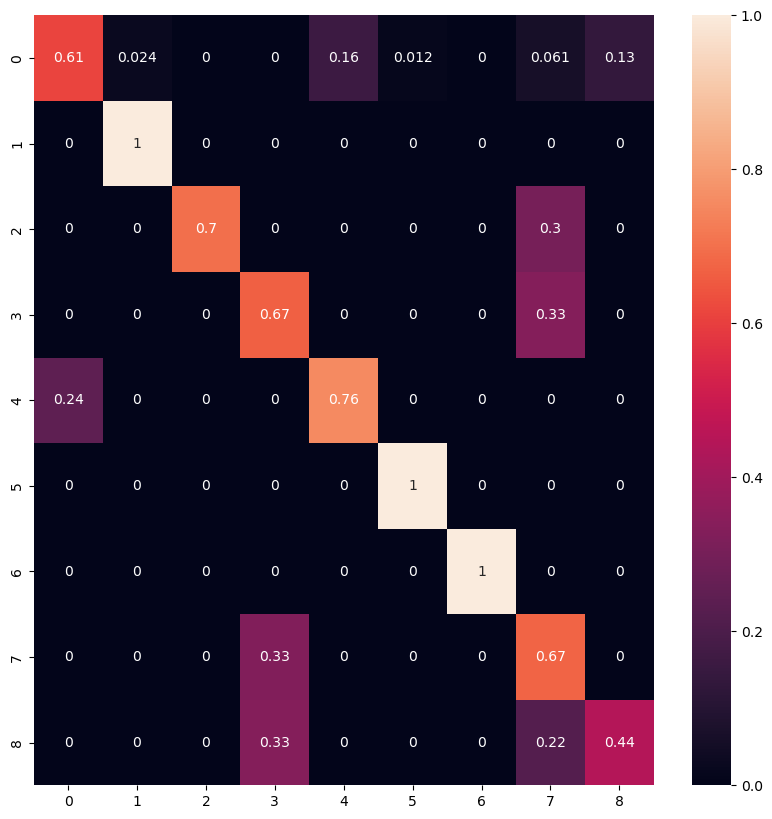

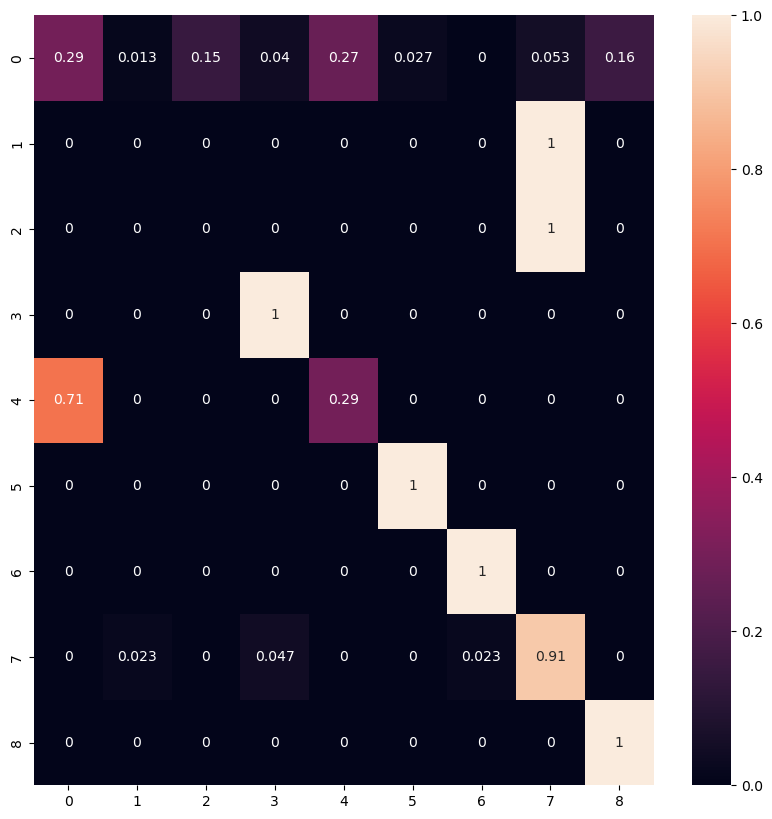

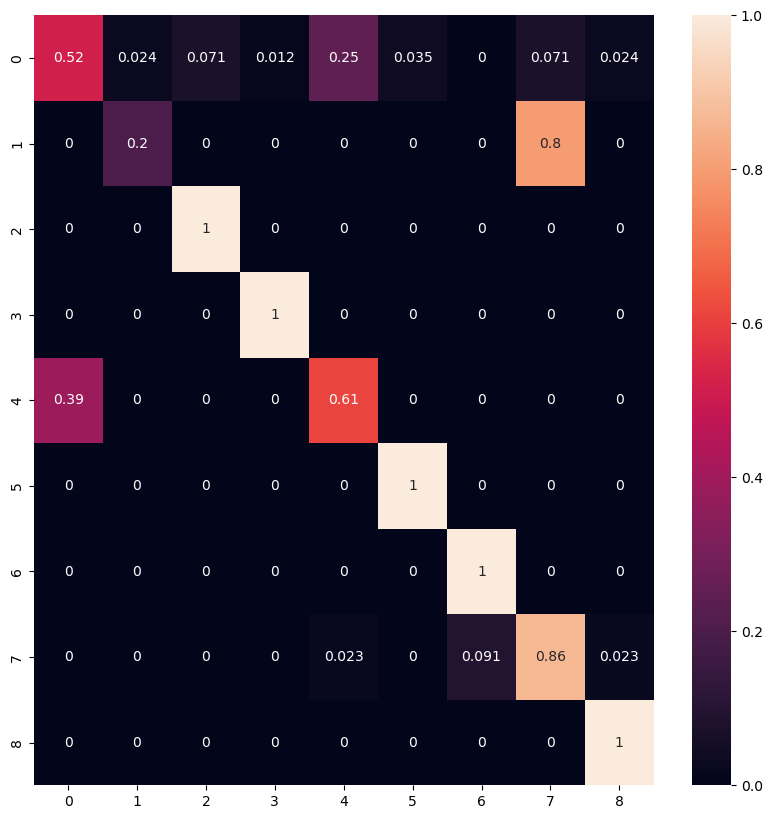

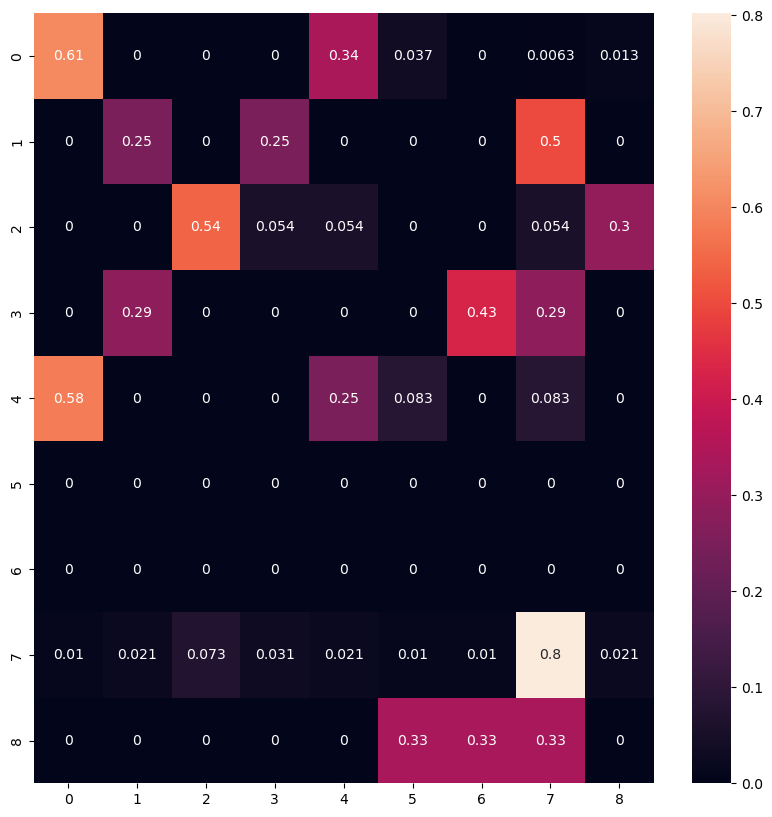

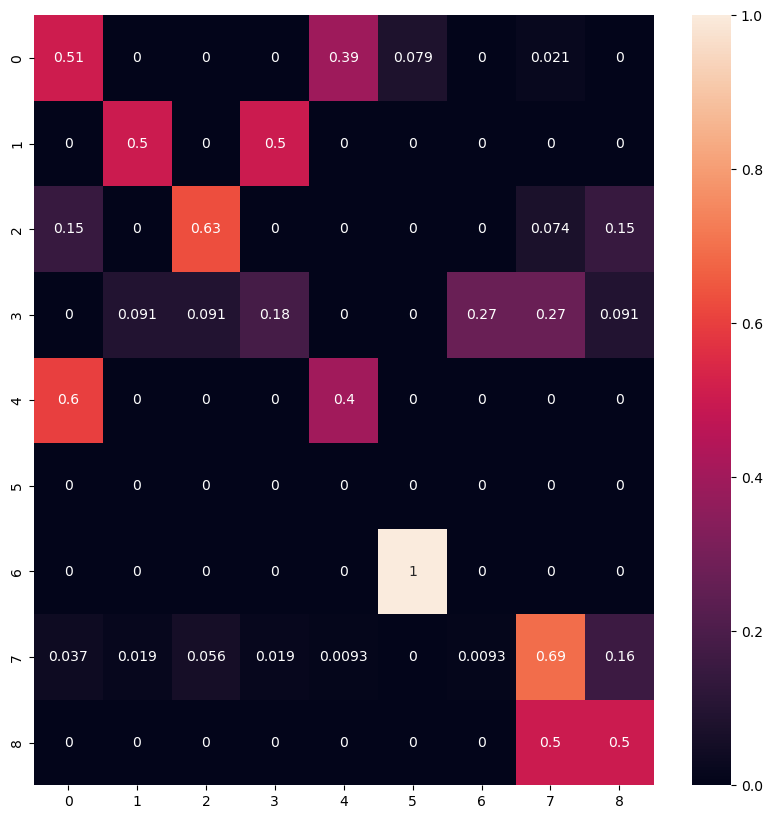

In [29]:
test_set=os.listdir('./test_set_df_acc')
out_rf=[]
for ID in test_set:
    output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score'])
out_df.describe()

In [30]:
out_df.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.641217,0.662442
std,0.085179,0.085209
min,0.487654,0.497483
25%,0.606024,0.648715
50%,0.666667,0.695560
75%,0.696749,0.703162
max,0.757576,0.771416


In [31]:
out_df_xgb.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.668484,0.683255
std,0.064610,0.070352
min,0.532609,0.535123
25%,0.645846,0.660036
50%,0.674436,0.695436
75%,0.705448,0.719400
max,0.761905,0.774482
